In [4]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 

In [5]:
series_new = read_csv('../data/clean_df.csv', header=0, parse_dates=[2], index_col=0, squeeze=True)

In [6]:
errors = []
count = 0
for dataid in series_new['dataid'].unique():

    df = series_new.sort_values(['dataid','localhour'])[(series_new['dataid']==dataid) 
                                                        & (series_new['localhour'] < '2015-04-02')
                                                        & (series_new['localhour'] >= '2015-03-12')]['usage']

    X = df.values
    size = int(len(X) * 0.95)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(3,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('t=%f' % t, end="\r")
    error = mean_squared_error(test, predictions)
    count += 1
    errors.append(error)
    print('Ave error: ' + str(sum(errors)/len(errors)) + ', dataid: ' + str(dataid) + ', Test MSE: %.3f' % error)



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Ave error: 1.30518138717, dataid: 26, Test MSE: 1.305
Ave error: 0.92358177618, dataid: 77, Test MSE: 0.542
Ave error: 0.96926148596, dataid: 86, Test MSE: 1.061
Ave error: 0.77550455885, dataid: 93, Test MSE: 0.194
Ave error: 0.627553769229, dataid: 101, Test MSE: 0.036
Ave error: 0.638500572807, dataid: 114, Test MSE: 0.693
Ave error: 0.554595296483, dataid: 115, Test MSE: 0.051
Ave error: 0.488960299283, dataid: 160, Test MSE: 0.030
Ave error: 0.44102957668, dataid: 171, Test MSE: 0.058
Ave error: 0.399137050313, dataid: 203, Test MSE: 0.022
Ave error: 0.504914972279, dataid: 222, Test MSE: 1.563
Ave error: 0.469352522894, dataid: 232, Test MSE: 0.078
Ave error: 0.488752480406, dataid: 252, Test MSE: 0.722
Ave error: 0.577594125095, dataid: 434, Test MSE: 1.733


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Ave error: 0.544075553348, dataid: 484, Test MSE: 0.075
Ave error: 0.5271579951, dataid: 503, Test MSE: 0.273
Ave error: 0.501836318465, dataid: 516, Test MSE: 0.097
Ave error: 0.494305766468, dataid: 545, Test MSE: 0.366
Ave error: 0.725693992662, dataid: 547, Test MSE: 4.891
Ave error: 0.700305946349, dataid: 580, Test MSE: 0.218
Ave error: 0.668578814811, dataid: 585, Test MSE: 0.034
Ave error: 0.639323506953, dataid: 624, Test MSE: 0.025
Ave error: 0.63719320661, dataid: 661, Test MSE: 0.590
Ave error: 0.615747456327, dataid: 668, Test MSE: 0.122
Ave error: 0.592426938987, dataid: 739, Test MSE: 0.033
Ave error: 0.583041130034, dataid: 744, Test MSE: 0.348
Ave error: 0.57273664978, dataid: 781, Test MSE: 0.305
Ave error: 0.554486827908, dataid: 821, Test MSE: 0.062
Ave error: 0.544697745163, dataid: 871, Test MSE: 0.271
Ave error: 0.532665608404, dataid: 890, Test MSE: 0.184
Ave error: 0.523513684089, dataid: 946, Test MSE: 0.249
Ave error: 0.520638128054, dataid: 974, Test MSE: 0.

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Ave error: 0.476498683005, dataid: 2242, Test MSE: 1.557
Ave error: 0.472256192979, dataid: 2337, Test MSE: 0.158
Ave error: 0.467805813994, dataid: 2361, Test MSE: 0.134
Ave error: 0.462574556601, dataid: 2365, Test MSE: 0.065


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Ave error: 0.464112128134, dataid: 2378, Test MSE: 0.583
Ave error: 0.478958747689, dataid: 2449, Test MSE: 1.637
Ave error: 0.477845951917, dataid: 2470, Test MSE: 0.390
Ave error: 0.483335152771, dataid: 2472, Test MSE: 0.922
Ave error: 0.487807712404, dataid: 2532, Test MSE: 0.850
Ave error: 0.482623637778, dataid: 2557, Test MSE: 0.058
Ave error: 0.479374738899, dataid: 2575, Test MSE: 0.210
Ave error: 0.476109733174, dataid: 2606, Test MSE: 0.202
Ave error: 0.483672340597, dataid: 2638, Test MSE: 1.126
Ave error: 0.479446994416, dataid: 2641, Test MSE: 0.116
Ave error: 0.480954924276, dataid: 2710, Test MSE: 0.612
Ave error: 0.47843150239, dataid: 2742, Test MSE: 0.256


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Ave error: 0.475796241787, dataid: 2755, Test MSE: 0.241
Ave error: 0.476787037311, dataid: 2769, Test MSE: 0.566
Ave error: 0.473966058204, dataid: 2787, Test MSE: 0.217
Ave error: 0.472031436236, dataid: 2814, Test MSE: 0.294
Ave error: 0.468640770401, dataid: 2818, Test MSE: 0.153
Ave error: 0.464998000448, dataid: 2829, Test MSE: 0.123
Ave error: 0.460200914757, dataid: 2859, Test MSE: 0.004


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Ave error: 0.464950681808, dataid: 2925, Test MSE: 0.921
Ave error: 0.462995529951, dataid: 2931, Test MSE: 0.273
Ave error: 0.45833363386, dataid: 2945, Test MSE: 0.001
Ave error: 0.456670576444, dataid: 2953, Test MSE: 0.292
Ave error: 0.454469650164, dataid: 2980, Test MSE: 0.234
Ave error: 0.450066130867, dataid: 2986, Test MSE: 0.005
Ave error: 0.446662761166, dataid: 3009, Test MSE: 0.100
Ave error: 0.450144443086, dataid: 3036, Test MSE: 0.809
Ave error: 0.458963091755, dataid: 3039, Test MSE: 1.376
Ave error: 0.454819355123, dataid: 3104, Test MSE: 0.020
Ave error: 0.4512653645, dataid: 3134, Test MSE: 0.075
Ave error: 0.447445984592, dataid: 3192, Test MSE: 0.039
Ave error: 0.453351375402, dataid: 3221, Test MSE: 1.091
Ave error: 0.449283333809, dataid: 3268, Test MSE: 0.006
Ave error: 0.446884685643, dataid: 3273, Test MSE: 0.183
Ave error: 0.447814734008, dataid: 3310, Test MSE: 0.551
Ave error: 0.455361783132, dataid: 3367, Test MSE: 1.301
Ave error: 0.455546573804, dataid:

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Ave error: 0.505492314032, dataid: 4773, Test MSE: 0.095
Ave error: 0.502599673045, dataid: 4874, Test MSE: 0.031
Ave error: 0.502553408792, dataid: 4920, Test MSE: 0.495
Ave error: 0.499594342016, dataid: 4934, Test MSE: 0.011
Ave error: 0.503692794378, dataid: 4946, Test MSE: 1.184
Ave error: 0.503107914787, dataid: 4957, Test MSE: 0.405
Ave error: 0.501935925607, dataid: 4974, Test MSE: 0.305
Ave error: 0.50584727268, dataid: 4998, Test MSE: 1.167
Ave error: 0.509176973367, dataid: 5026, Test MSE: 1.075
Ave error: 0.50871683918, dataid: 5035, Test MSE: 0.430
Ave error: 0.506982611904, dataid: 5060, Test MSE: 0.209
Ave error: 0.505031503488, dataid: 5129, Test MSE: 0.167
Ave error: 0.504982851301, dataid: 5187, Test MSE: 0.497
Ave error: 0.502337581518, dataid: 5218, Test MSE: 0.039
Ave error: 0.505913018111, dataid: 5246, Test MSE: 1.135
Ave error: 0.504920262851, dataid: 5262, Test MSE: 0.329
Ave error: 0.502296080401, dataid: 5275, Test MSE: 0.035
Ave error: 0.502914232426, dataid

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Ave error: 0.496039235735, dataid: 5568, Test MSE: 0.176
Ave error: 0.502875729226, dataid: 5673, Test MSE: 1.802
Ave error: 0.500509301902, dataid: 5677, Test MSE: 0.049
Ave error: 0.501642637343, dataid: 5738, Test MSE: 0.719
Ave error: 0.499133770989, dataid: 5785, Test MSE: 0.015
Ave error: 0.498728285621, dataid: 5796, Test MSE: 0.420
Ave error: 0.504381374493, dataid: 5809, Test MSE: 1.607
Ave error: 0.5030804581, dataid: 5810, Test MSE: 0.248
Ave error: 0.501908815323, dataid: 5814, Test MSE: 0.271
Ave error: 0.509087922156, dataid: 5852, Test MSE: 1.931
Ave error: 0.507383121529, dataid: 5889, Test MSE: 0.168
Ave error: 0.50775968941, dataid: 5892, Test MSE: 0.583
Ave error: 0.50572907195, dataid: 5904, Test MSE: 0.098
Ave error: 0.503902737399, dataid: 5921, Test MSE: 0.135
Ave error: 0.501460224947, dataid: 5938, Test MSE: 0.006
Ave error: 0.501568702298, dataid: 5959, Test MSE: 0.524
Ave error: 0.499849729105, dataid: 5972, Test MSE: 0.147
Ave error: 0.501055431165, dataid: 

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Ave error: 0.505952040831, dataid: 7549, Test MSE: 0.036
Ave error: 0.508356018376, dataid: 7560, Test MSE: 1.097
Ave error: 0.508090625739, dataid: 7617, Test MSE: 0.443
Ave error: 0.508304291473, dataid: 7627, Test MSE: 0.561
Ave error: 0.508406884427, dataid: 7641, Test MSE: 0.534
Ave error: 0.50670433584, dataid: 7719, Test MSE: 0.083
Ave error: 0.5047236137, dataid: 7739, Test MSE: 0.010
Ave error: 0.504613563785, dataid: 7741, Test MSE: 0.477
Ave error: 0.502693907039, dataid: 7767, Test MSE: 0.019
Ave error: 0.500738029672, dataid: 7769, Test MSE: 0.006
Ave error: 0.499695575081, dataid: 7787, Test MSE: 0.235
Ave error: 0.500008797489, dataid: 7788, Test MSE: 0.580
Ave error: 0.498082235533, dataid: 7793, Test MSE: 0.005
Ave error: 0.496918359517, dataid: 7794, Test MSE: 0.198
Ave error: 0.495001190639, dataid: 7800, Test MSE: 0.000
Ave error: 0.495286928505, dataid: 7850, Test MSE: 0.569
Ave error: 0.497476908811, dataid: 7863, Test MSE: 1.067
Ave error: 0.499016507566, dataid:

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Ave error: 0.49732858578, dataid: 8046, Test MSE: 0.951
Ave error: 0.495973732541, dataid: 8061, Test MSE: 0.132
Ave error: 0.497731606175, dataid: 8079, Test MSE: 0.972
Ave error: 0.496067627687, dataid: 8084, Test MSE: 0.045
Ave error: 0.494387158322, dataid: 8086, Test MSE: 0.037
Ave error: 0.500786168129, dataid: 8156, Test MSE: 2.248
Ave error: 0.499572030354, dataid: 8163, Test MSE: 0.167
Ave error: 0.499315394169, dataid: 8188, Test MSE: 0.429
Ave error: 0.500857315173, dataid: 8197, Test MSE: 0.926
Ave error: 0.501117990865, dataid: 8201, Test MSE: 0.573
Ave error: 0.500657858248, dataid: 8218, Test MSE: 0.373
Ave error: 0.506716652536, dataid: 8236, Test MSE: 2.197
Ave error: 0.505053655741, dataid: 8243, Test MSE: 0.039
Ave error: 0.504767204439, dataid: 8273, Test MSE: 0.424
Ave error: 0.504348813612, dataid: 8282, Test MSE: 0.386
Ave error: 0.503442937327, dataid: 8292, Test MSE: 0.247
Ave error: 0.501702179602, dataid: 8317, Test MSE: 0.007
Ave error: 0.499977156917, datai

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Ave error: 0.485743933145, dataid: 9654, Test MSE: 0.034
Ave error: 0.484293435183, dataid: 9701, Test MSE: 0.019
Ave error: 0.484428339813, dataid: 9729, Test MSE: 0.528
Ave error: 0.48599108895, dataid: 9737, Test MSE: 0.991
Ave error: 0.485933414232, dataid: 9766, Test MSE: 0.467
Ave error: 0.4875656919, dataid: 9771, Test MSE: 1.018
Ave error: 0.486154606134, dataid: 9775, Test MSE: 0.026
Ave error: 0.489014795582, dataid: 9776, Test MSE: 1.424
Ave error: 0.48795987521, dataid: 9818, Test MSE: 0.142
Ave error: 0.488614498341, dataid: 9875, Test MSE: 0.704
Ave error: 0.487334173704, dataid: 9912, Test MSE: 0.065
Ave error: 0.48610225535, dataid: 9915, Test MSE: 0.078
Ave error: 0.486391529918, dataid: 9921, Test MSE: 0.582
Ave error: 0.486507554031, dataid: 9922, Test MSE: 0.525
Ave error: 0.485187292975, dataid: 9932, Test MSE: 0.044
Ave error: 0.494867357583, dataid: 9933, Test MSE: 3.738
Ave error: 0.496009548559, dataid: 9935, Test MSE: 0.880
Ave error: 0.495219051065, dataid: 9

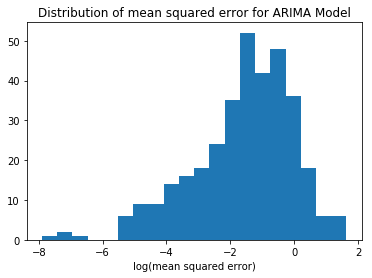

Average mean squared error: 0.492931579608


In [7]:
import numpy as np
pyplot.hist(np.log(errors), bins=20)
pyplot.xlabel("log(mean squared error)")
pyplot.title("Distribution of mean squared error for ARIMA Model")
pyplot.show()
print('Average mean squared error: ' + str(sum(errors)/len(errors)))

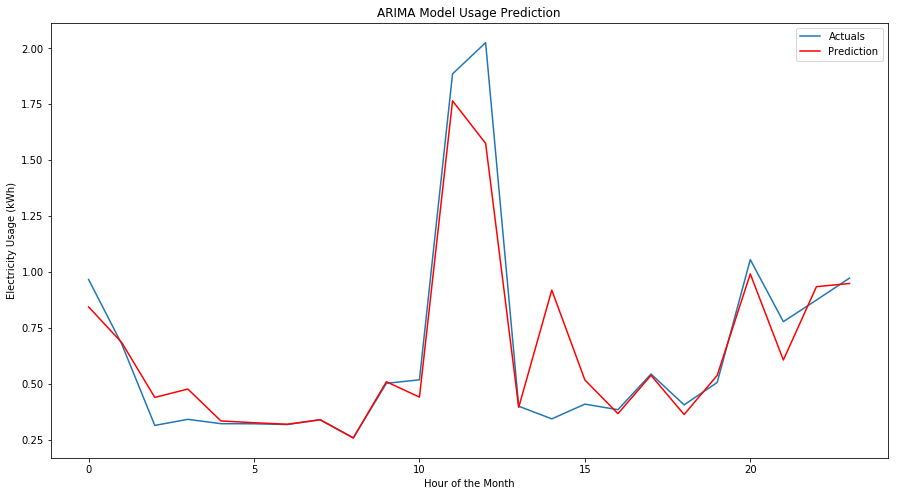

In [9]:
pyplot.figure(figsize=(15,8))
pyplot.plot(test[:24], label='Actuals')
pyplot.plot(predictions[1:25], color='red', label='Prediction')
pyplot.xlabel("Hour of the Month")
pyplot.ylabel("Electricity Usage (kWh)")
pyplot.title("ARIMA Model Usage Prediction")
pyplot.legend()
pyplot.show()

In [1]:
perc_list2 = [0.0,
 0.050000000000000003,
 0.10000000000000001,
 0.14999999999999999,
 0.20000000000000001,
 0.25,
 0.29999999999999999,
 0.34999999999999998,
 0.40000000000000002,
 0.45000000000000001,
 0.5,
 0.55000000000000004,
 0.59999999999999998,
 0.65000000000000002,
 0.69999999999999996,
 0.75,
 0.80000000000000004,
 0.84999999999999998,
 0.90000000000000002,
 0.94999999999999996]

In [2]:
perc_errors2 = [0.0,
 0.061224489795918366,
 0.15743440233236153,
 0.20699708454810495,
 0.2857142857142857,
 0.34110787172011664,
 0.4110787172011662,
 0.4752186588921283,
 0.5131195335276968,
 0.5481049562682215,
 0.597667638483965,
 0.6209912536443148,
 0.6588921282798834,
 0.6822157434402333,
 0.7113702623906706,
 0.7317784256559767,
 0.749271137026239,
 0.7638483965014577,
 0.7725947521865889,
 0.793002915451895]

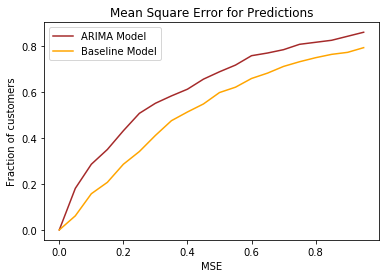

In [13]:
perc_errors = []
perc_list = []
for perc in np.arange(0,20,1):
    perc= perc/20.0
    num = sum([1 if row < perc else 0 for row in errors])
    perc_errors.append(num/len(errors))
    perc_list.append(perc)
pyplot.plot(perc_list, perc_errors, color="brown", label="ARIMA Model")
pyplot.plot(perc_list2, perc_errors2, color="orange", label="Baseline Model")
pyplot.xlabel("MSE")
pyplot.ylabel("Fraction of customers")
pyplot.title("Mean Square Error for Predictions")
pyplot.legend()
pyplot.show()